In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv("Advertising.csv")

In [6]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
dataset.shape

(200, 5)

In [8]:
dataset.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
dataset.duplicated().any()

False

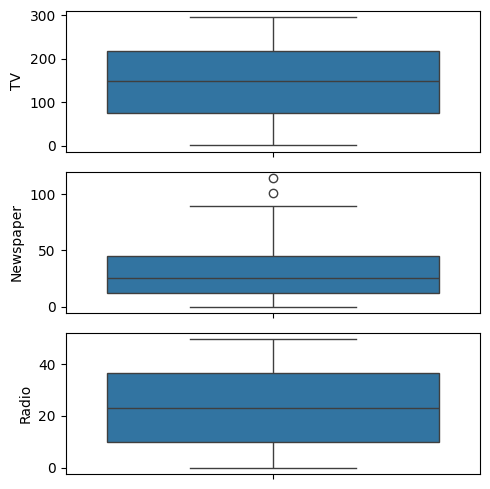

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv("Advertising.csv")

fig, axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(dataset['TV'],ax=axs[0])
plt2=sns.boxplot(dataset['Newspaper'],ax=axs[1])
plt3=sns.boxplot(dataset['Radio'],ax=axs[2])
plt.tight_layout()

/tmp/ipykernel_8043/475624845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sales']);


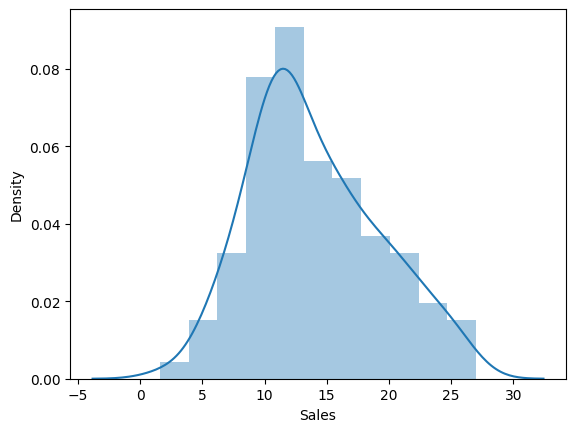

In [9]:
sns.distplot(dataset['Sales']);

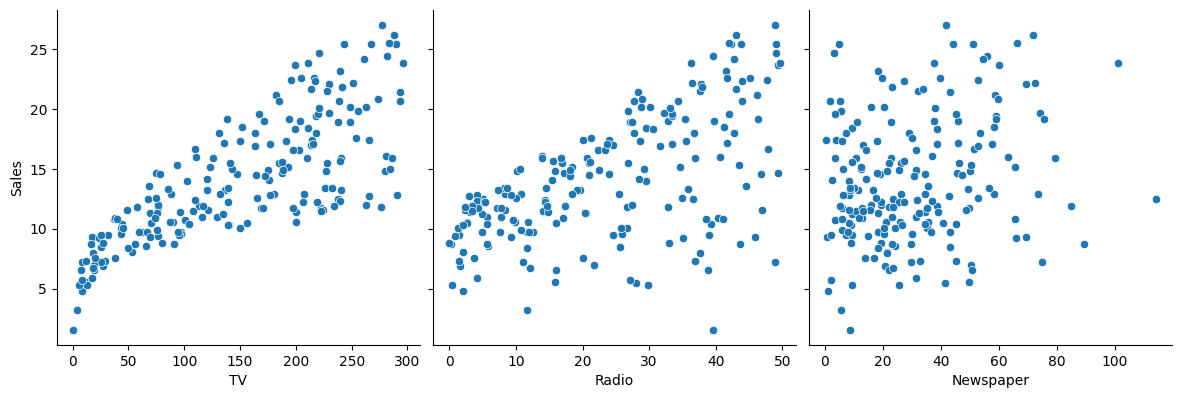

In [10]:
sns.pairplot(dataset,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()